# I . IMPORTS

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# II . LOAD DATA

1- importer le fichier de données

In [2]:
df = pd.read_csv("data_STK.csv", sep =',',  header =0)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


# III . DATA DESCRIPTION

- Afficher une description générale des données (premières et dernières lignes)

In [3]:
df.shape

(5110, 12)

In [4]:
df.head(-3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0


In [5]:
#last n rows from df
df.tail(-3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 1. Data Dimension

In [6]:
df.shape

(5110, 12)

- Afficher le shape des lignes et des colonnes du dataframe
**nombrede ligne 5110*
**nombre de colonnes: 12*

In [7]:
print("Le nombre de ligne",df.shape[0])
print("Le nombre de colonne",df.shape[1])

Le nombre de ligne 5110
Le nombre de colonne 12


## 2. Data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
#print(df.dtypes)
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
for var in df.columns:
    print('Variable:',var,'\tType:',df[var].dtype,df[var].isnull().sum())

Variable: id 	Type: int64 0
Variable: gender 	Type: object 0
Variable: age 	Type: float64 0
Variable: hypertension 	Type: int64 0
Variable: heart_disease 	Type: int64 0
Variable: ever_married 	Type: object 0
Variable: work_type 	Type: object 0
Variable: Residence_type 	Type: object 0
Variable: avg_glucose_level 	Type: float64 0
Variable: bmi 	Type: float64 201
Variable: smoking_status 	Type: object 0
Variable: stroke 	Type: int64 0


2.4 - Supprimer la colonne Id qui n'est pas intéressante (df.drop(['col'], axis=1, inplace=True))

Vérifier.

In [11]:
df.drop(['id'], axis=1, inplace=True)

2.5 - vérifier la suppression

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
df['age'] = df['age'].astype('int64')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


##  3. Check NaN

3.1 - Vérifier l'existance de valeurs manquantes

In [15]:
df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

3.2 - chercher le nombre de valeurs NaN dans chaque colonne et son nombre de valeurs

In [16]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
df.bmi.isna().value_counts()

bmi
False    4909
True      201
Name: count, dtype: int64

**si nous souhaitons supprimer toutes les lignes contanant des NaN**

In [18]:
dd=df

In [19]:
dd.dropna(subset=['bmi'],axis=0,inplace=False)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Nous n'allons pas supprimer les NaN mais plutot les remplacer par la moyenne de la colonne 'bmi'**

In [20]:
df.bmi.fillna(df['bmi'].mean(), inplace=True)

3.4 - Afficher le nombre lignes pour chaque classe de la colonne Stroke

In [21]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

la base n'est pas equilibrée

3.5 - afficher le nombre de femme et d'homme (gender) dans le dataframe

In [22]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

3.6 - afficher le nombre de personnes mariées

In [23]:
df.ever_married.value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

## 4. Descriptive Statistical

4.1 - examiner le rapport entre le type de travail et le stroke (pandas.crosstab(...))

In [24]:
pd.crosstab(df['work_type'],df['stroke'])

stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2776,149
Self-employed,754,65
children,685,2


4.2 - visualiser ce rapport avec df.plot.scatter(...) puis avec sns.countplot(..)

Text(0, 0.5, 'stroke')

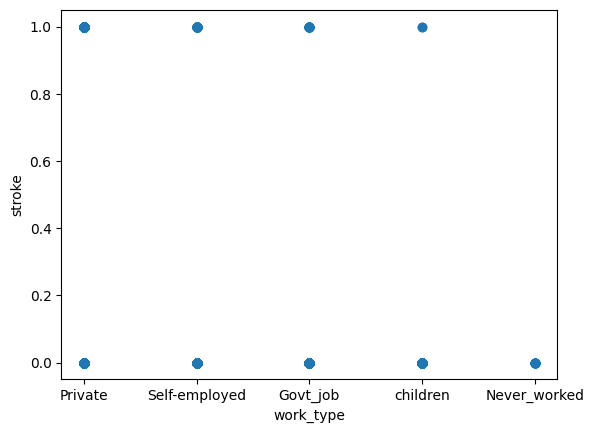

In [25]:
import matplotlib.pyplot as plt
plt.scatter(x=df['work_type'],y=df['stroke'])
plt.xlabel('work_type')
plt.ylabel('stroke')

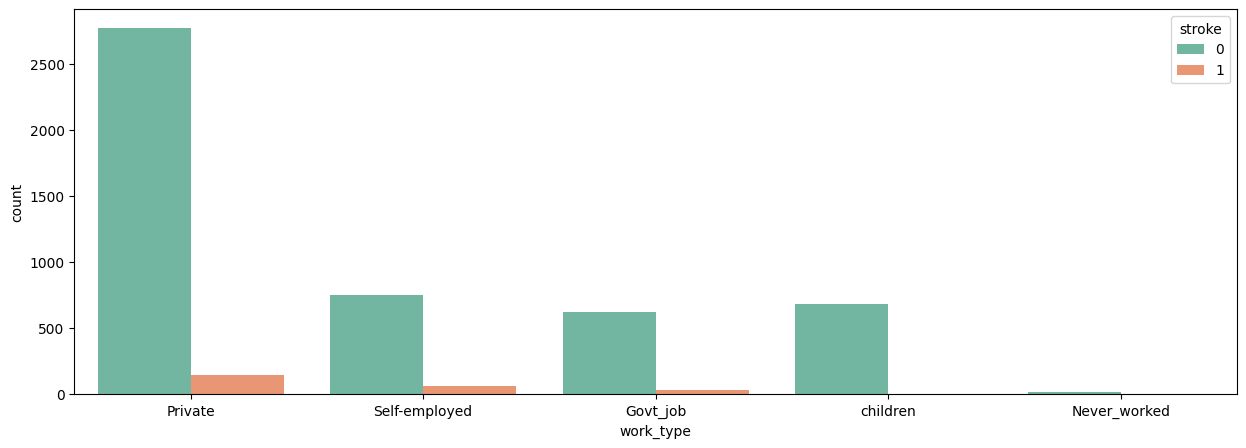

In [26]:
plt.figure(figsize=(15,5))

sns.countplot( x='work_type', hue=df['stroke'], palette='Set2', data=df);

## 5. Numerical Variable

In [27]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [28]:
df_num = df[['age', 'avg_glucose_level', 'bmi']]

In [29]:
df_cat = df[['gender', 'hypertension', 'heart_disease', 'ever_married',
                             'work_type', 'Residence_type', 'smoking_status']]

5.3 - Afficher en histogrammes les statistiques des variables numériques

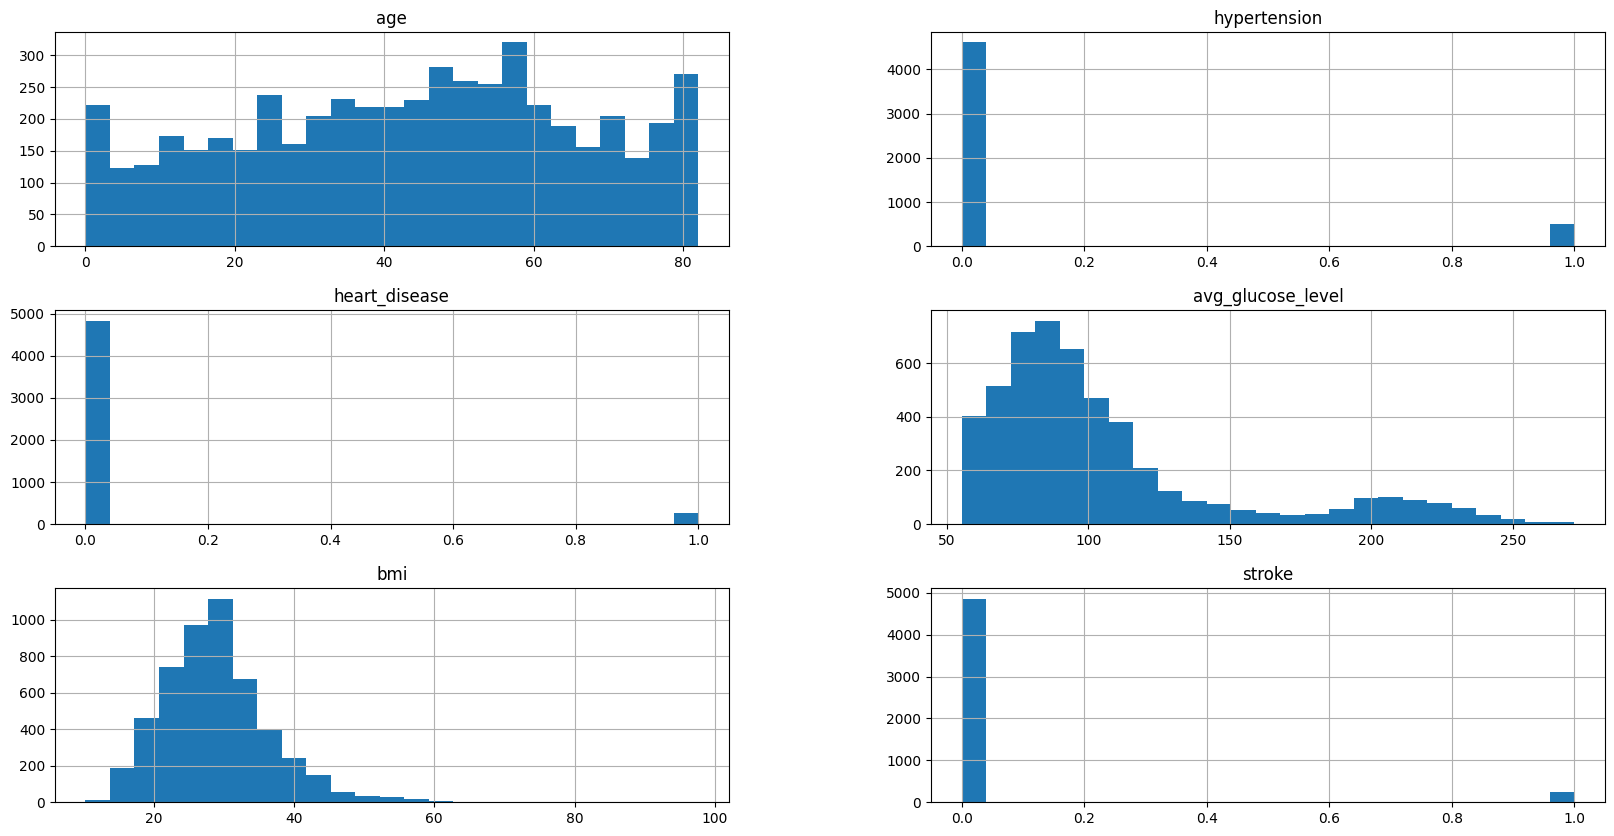

In [30]:
df.hist(bins=25, figsize=(20,10));

5.4 - Afficher en barres le nombre d'observations de la variable catégorique 'stroke'.

<Axes: xlabel='stroke', ylabel='count'>

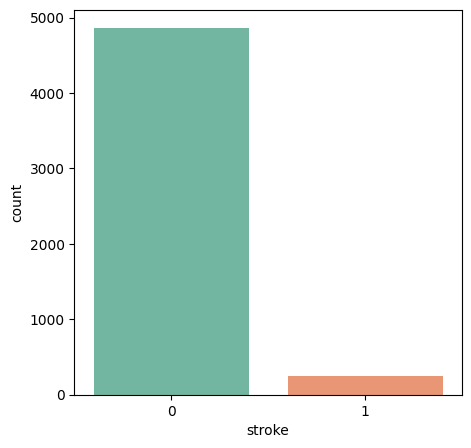

In [31]:
plt.figure(figsize=(5,5))
sns.countplot( x='stroke', palette='Set2', data=df)

# IV. Visualisation and cleaning data

1 - Afficher quelque boîtes à moustaches (boxplot)

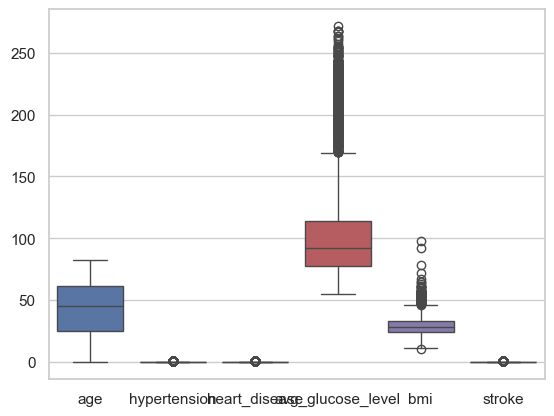

In [32]:
sns.set(style='whitegrid')
ax=sns.boxplot(data=df,orient='v')

## IV.1 - traitement des valeurs aberrantes de la colonne 'bmi'

1. diagramme en moustache (boxplot)

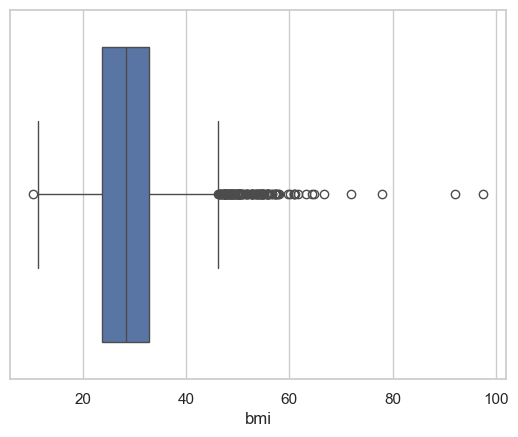

In [33]:
sns.set(style='whitegrid')
ax=sns.boxplot(df['bmi'],orient='h')

2 - calculer les 4 quartiles (Q1,Q3,IRQ) et Sup, Inf

In [34]:
Q1=df['bmi'].quantile(0.25)
Q3=df['bmi'].quantile(0.75)
IQR=Q3-Q1
Inf = df['bmi'].quantile(0.25)-1.5*IQR
Sup = df['bmi'].quantile(0.75)+1.5*IQR

In [35]:
print(Sup)

46.29999999999999


3- déduire le nombre de outliers

In [36]:
df[df['bmi']>=Sup].count()

gender               125
age                  125
hypertension         125
heart_disease        125
ever_married         125
work_type            125
Residence_type       125
avg_glucose_level    125
bmi                  125
smoking_status       125
stroke               125
dtype: int64

4 - Ecrire une méthode drop_outliers() qui supprime les outliers du dataframe

In [37]:
def drop_outliers(data,field_name):
    q1=data[field_name].quantile(0.25)
    q3=data[field_name].quantile(0.75)
    iqr=q3-q1
    inf = data[field_name].quantile(0.25)-1.5*iqr
    sup = data[field_name].quantile(0.75)+1.5*iqr
    data.drop(data[data[field_name]>sup].index,inplace=True)
    data.drop(data[data[field_name]<inf].index,inplace=True)


In [38]:
drop_outliers(df,'bmi')

5 - retracer le diagramme en moustache pour les 'bmi'

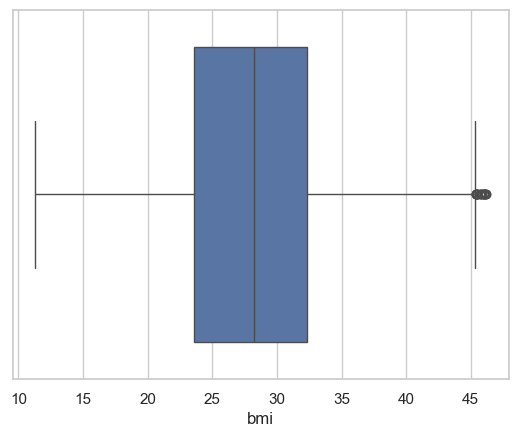

In [39]:
sns.set(style='whitegrid')
ax=sns.boxplot(df['bmi'],orient='h')

##  IV.2 - Traitement des valeurs aberrantes dans 'avg_glucose_level'

 1- tracer le diagramme en moustache pour les 'avg_glucose_level'

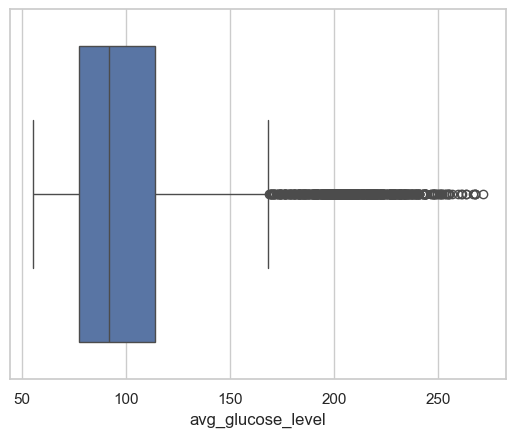

In [40]:
sns.set(style='whitegrid')
ax=sns.boxplot(df['avg_glucose_level'],orient='h')

2 - remplacer les outliers par la mediane

In [41]:
Q1g=df['avg_glucose_level'].quantile(0.25)
Q3g=df['avg_glucose_level'].quantile(0.75)
IQRg=Q3g-Q1g
Infg = df['avg_glucose_level'].quantile(0.25)-1.5*IQRg
Supg = df['avg_glucose_level'].quantile(0.75)+1.5*IQRg
for i in df['avg_glucose_level']:
     if i >=Supg or i<=Infg :
            df['avg_glucose_level']=df['avg_glucose_level'].replace(i,np.mean(df['avg_glucose_level']))

3- retracer le diagramme en moustache pour les 'avg_glucose_level'

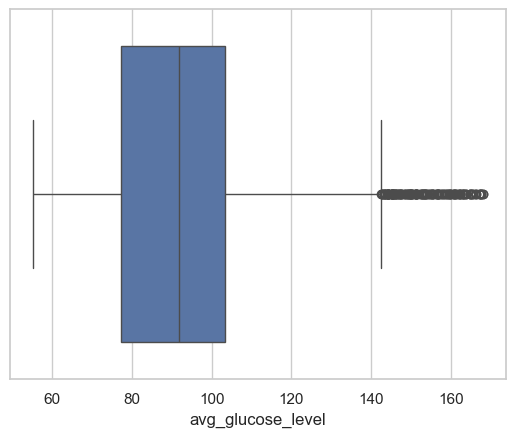

In [42]:
sns.set(style='whitegrid')
ax=sns.boxplot(x=df['avg_glucose_level'],orient='h') #, showfliers=False)

In [43]:
df.loc[df['avg_glucose_level']>=Supg].count()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [44]:
print(Supg)
print(Infg)

168.59124999999997
22.36125000000002


# V. Autres visualisations statistiques

1- Afficher en barres le nombre d'observations de la variable catégorique 'stroke' classée par 'Gender'.

Interpréter.

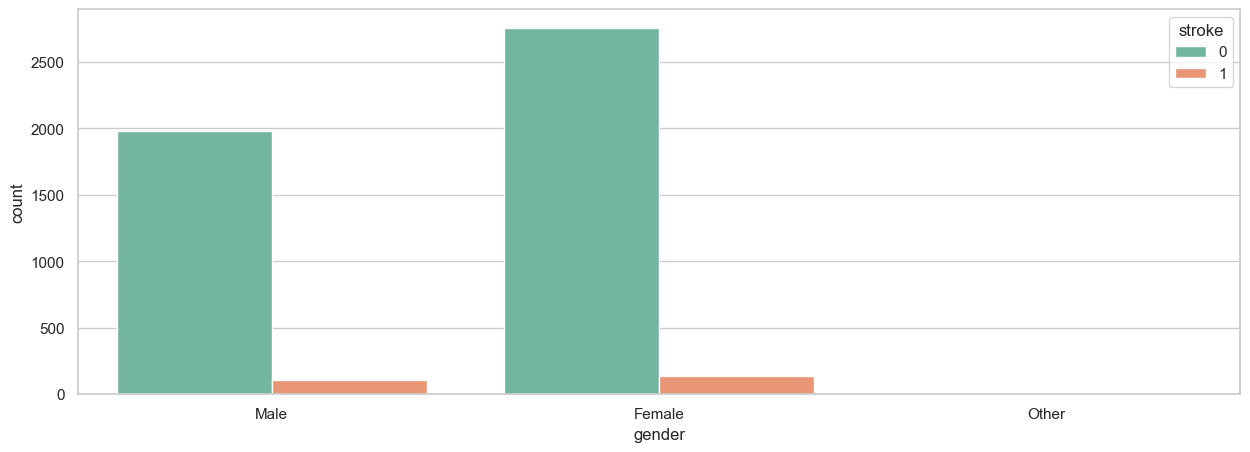

In [45]:
plt.figure(figsize=(15,5))

sns.countplot(data=df, x='gender',hue=df['stroke'], palette='Set2');

2- Afficher en barres le nombre d'observations de la variable catégorique 'stroke' classée par 'work_type'.

Interpréter.

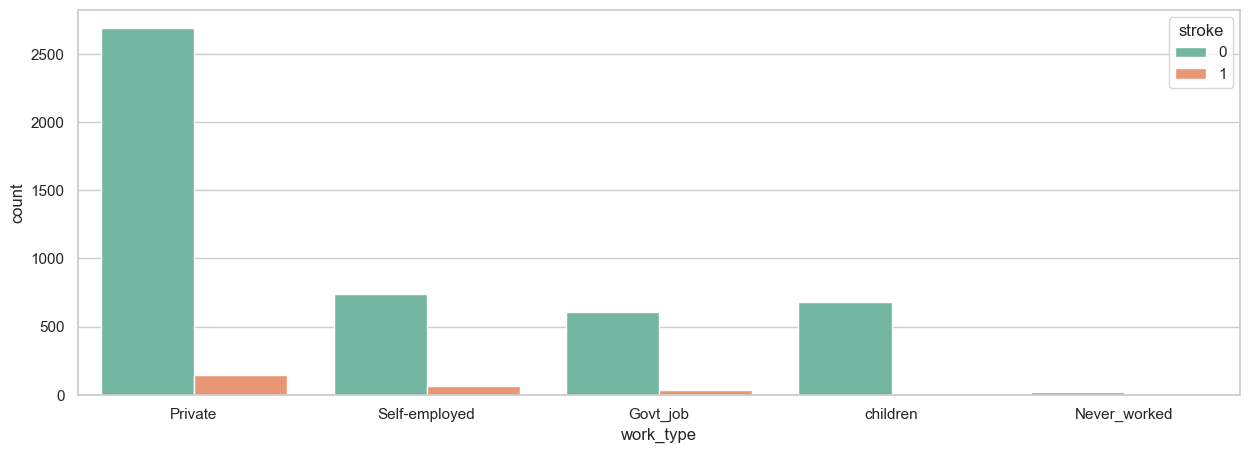

In [46]:
plt.figure(figsize=(15,5))

sns.countplot(x='work_type',hue=df['stroke'],palette='Set2',data=df);

3- Afficher en barres le nombre de lignes par type de résidence

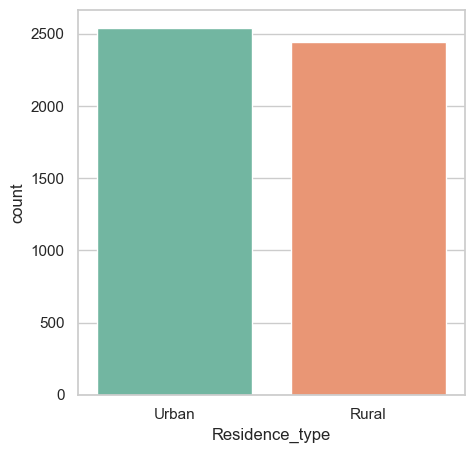

In [47]:
plt.figure(figsize=(5,5))
sns.countplot( x='Residence_type', palette='Set2', data=df);

4- Afficher en barres le nombre d'observations de la variable catégorique 'stroke' classée par 'ever_married'.

Interpréter.

<Axes: xlabel='ever_married', ylabel='count'>

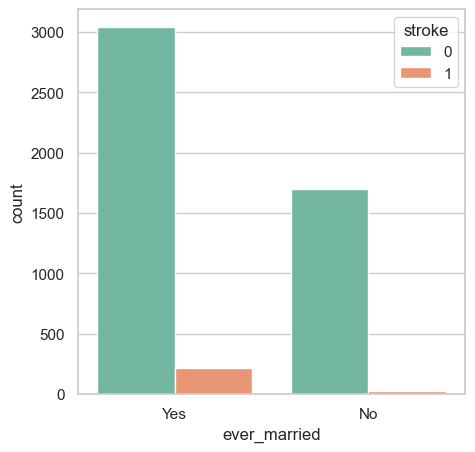

In [48]:
plt.figure(figsize=(5,5))
sns.countplot( x='ever_married', hue=df['stroke'], palette='Set2', data=df)

5- Afficher en barres le nombre d'observations de la variable catégorique 'stroke' classée par 'smoking_status'.

Interpréter.

<Axes: xlabel='smoking_status', ylabel='count'>

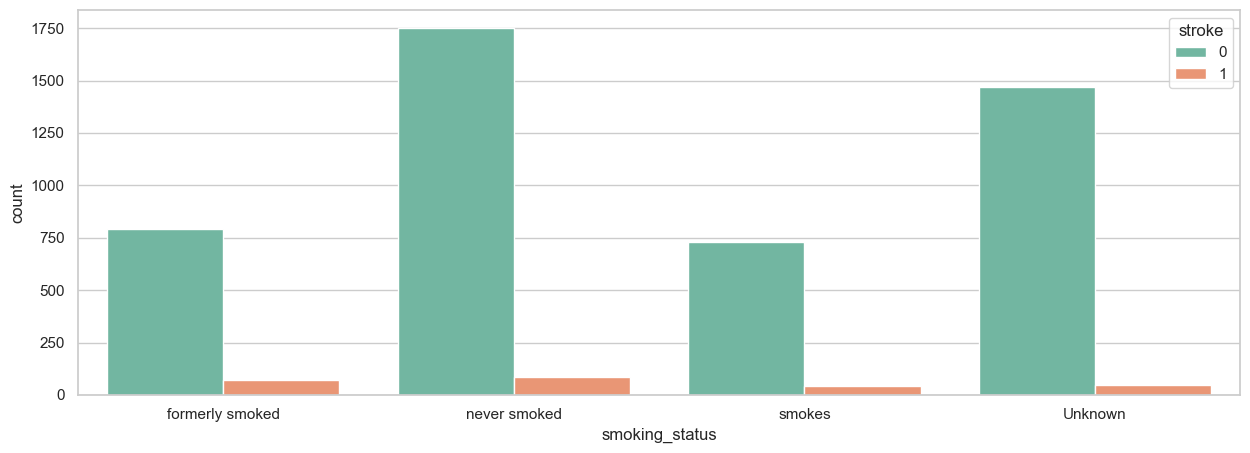

In [49]:
plt.figure(figsize=(15,5))
sns.countplot( x='smoking_status', hue=df['stroke'], palette='Set2', data=df)

6- Afficher la correlation entre les variables du dataframe (coefficient de pearson)

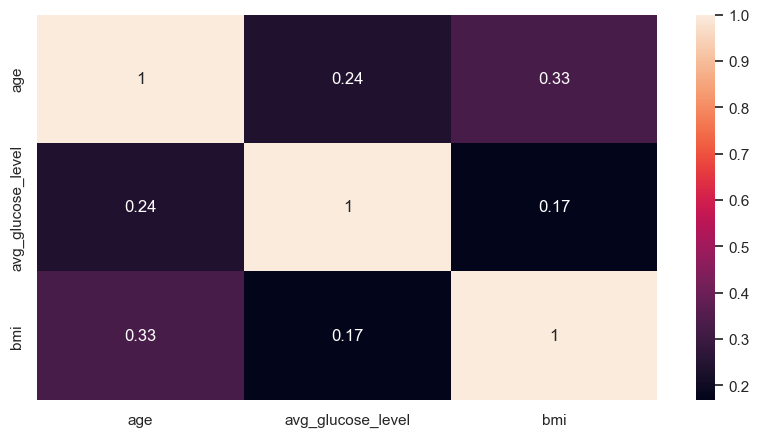

In [50]:
plt.figure(figsize=(10,5))
correlation = df_num.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

1 - Afficher un rappel de dimension et un echantillon du dataframe

In [51]:
df.shape

(4984, 11)

In [52]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,105.730688,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,105.706017,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,105.667292,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,105.654137,24.000000,never smoked,1


2 - affecter à Y (cible) la dernière colonne (stroke) et le reste du dataframe au entrées X

In [53]:
X = df.iloc[:,0:10]
Y= df.iloc[:,10]

3 - afficher un echontillion de X et Y

In [54]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67,0,1,Yes,Private,Urban,105.730688,36.600000,formerly smoked
1,Female,61,0,0,Yes,Self-employed,Rural,105.706017,28.893237,never smoked
2,Male,80,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked
3,Female,49,0,0,Yes,Private,Urban,105.667292,34.400000,smokes
4,Female,79,1,0,Yes,Self-employed,Rural,105.654137,24.000000,never smoked


In [55]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

## VI.1 Transformer X et Y en tableau numpy

1 - lancer les commandes qui transforme X et Y en type numpyarray

In [56]:
X=X.values
Y=Y.values

2 - Vérifier le type et le contenu de X et Y

In [57]:
type(X)

numpy.ndarray

In [58]:
X[:5,:]

array([['Male', 67, 0, 1, 'Yes', 'Private', 'Urban', 105.7306882022472,
        36.6, 'formerly smoked'],
       ['Female', 61, 0, 0, 'Yes', 'Self-employed', 'Rural',
        105.706017393299, 28.893236911794666, 'never smoked'],
       ['Male', 80, 0, 1, 'Yes', 'Private', 'Rural', 105.92, 32.5,
        'never smoked'],
       ['Female', 49, 0, 0, 'Yes', 'Private', 'Urban',
        105.66729187860932, 34.4, 'smokes'],
       ['Female', 79, 1, 0, 'Yes', 'Self-employed', 'Rural',
        105.65413724214835, 24.0, 'never smoked']], dtype=object)

# VII. transformation des variables catégoriques

**1 - Nous commençons par les colonnes catégoriques à deux états 'gender','ever_married','Residence_type'**

In [59]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [60]:
X[:,0] = label.fit_transform(X[:,0]) # colonne gender devient 1-->male ou 0-->female
X[:,4] = label.fit_transform(X[:,4]) # colonne ever_married devient no-->0 ou yes-->1
X[:,6] = label.fit_transform(X[:,6]) # colonne Residence_type devient rural-->0 ou urban-->1

2 - Vérifier cette transformation

In [61]:
X[:10,:]

array([[1, 67, 0, 1, 1, 'Private', 1, 105.7306882022472, 36.6,
        'formerly smoked'],
       [0, 61, 0, 0, 1, 'Self-employed', 0, 105.706017393299,
        28.893236911794666, 'never smoked'],
       [1, 80, 0, 1, 1, 'Private', 0, 105.92, 32.5, 'never smoked'],
       [0, 49, 0, 0, 1, 'Private', 1, 105.66729187860932, 34.4, 'smokes'],
       [0, 79, 1, 0, 1, 'Self-employed', 0, 105.65413724214835, 24.0,
        'never smoked'],
       [1, 81, 0, 0, 1, 'Private', 1, 105.64040011077641, 29.0,
        'formerly smoked'],
       [1, 74, 1, 1, 1, 'Private', 0, 70.09, 27.4, 'never smoked'],
       [0, 69, 0, 0, 0, 'Private', 1, 94.39, 22.8, 'never smoked'],
       [0, 59, 0, 0, 1, 'Private', 0, 76.15, 28.893236911794666,
        'Unknown'],
       [0, 78, 0, 0, 1, 'Private', 1, 58.57, 24.2, 'Unknown']],
      dtype=object)

**3 - nous transformons la colonne work_type qui a 5 etats : 'private','self-employed','gov-job','children','never-worked'**

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [63]:
ct = ColumnTransformer([('work_type',OneHotEncoder(),[5])],\
                      remainder = 'passthrough')

In [64]:
X = ct.fit_transform(X)

4 - Vérifier la transformation de la colonne 'work_type' par 5 colonnes ajouter en début du X (shap et affichage)

In [65]:
X.shape # ajout de 4 autres colonnes
#private ---> 0.0 0.0 1.0 0.0 0.0

(4984, 14)

In [66]:
X[:,0:5]

array([[0.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 1.0, 0.0],
       [0.0, 0.0, 1.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, 1.0, 0.0],
       [0.0, 0.0, 1.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0]], dtype=object)

**5 - Nous remarquons que la première colonne peut être supprimée (on la supprime alors)**

In [67]:
X = X[:,1:]

6 - Vérifier cette suppression (shape et affichage d'un echantillion)

In [68]:
X.shape

(4984, 13)

In [69]:
X[:5,:]

array([[0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1, 105.7306882022472, 36.6,
        'formerly smoked'],
       [0.0, 0.0, 1.0, 0.0, 0, 61, 0, 0, 1, 0, 105.706017393299,
        28.893236911794666, 'never smoked'],
       [0.0, 1.0, 0.0, 0.0, 1, 80, 0, 1, 1, 0, 105.92, 32.5,
        'never smoked'],
       [0.0, 1.0, 0.0, 0.0, 0, 49, 0, 0, 1, 1, 105.66729187860932, 34.4,
        'smokes'],
       [0.0, 0.0, 1.0, 0.0, 0, 79, 1, 0, 1, 0, 105.65413724214835, 24.0,
        'never smoked']], dtype=object)

**7 - nous transformons la colonne 'smoking_status' qui a 4 etats :'formerly smoked','never smoked','smokes','unknown'**

In [70]:
ct = ColumnTransformer([('smoking_status',OneHotEncoder(),[12])],\
                      remainder = 'passthrough')

In [71]:
X = ct.fit_transform(X)

8 - Vérifier la transformation de la colonne 'smoking_status' par 4 colonne ajouter en début du X (shape et affichage)

In [72]:
X[:5,:] # smoking_status est remplacé par 4 colonnes au début

array([[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,
        105.7306882022472, 36.6],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 61, 0, 0, 1, 0,
        105.706017393299, 28.893236911794666],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 80, 0, 1, 1, 0,
        105.92, 32.5],
       [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0, 49, 0, 0, 1, 1,
        105.66729187860932, 34.4],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 79, 1, 0, 1, 0,
        105.65413724214835, 24.0]], dtype=object)

**9 - nous enlevons la première colonne**

In [73]:
X = X[:,1:]

10 - Vérifier cette suppression (shape et affichage)

In [74]:
X.shape

(4984, 15)

In [75]:
X[:5,:]

array([[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,
        105.7306882022472, 36.6],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 61, 0, 0, 1, 0,
        105.706017393299, 28.893236911794666],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 80, 0, 1, 1, 0, 105.92,
        32.5],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0, 49, 0, 0, 1, 1,
        105.66729187860932, 34.4],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 79, 1, 0, 1, 0,
        105.65413724214835, 24.0]], dtype=object)

# VIII. Splitting dataset into train and test sets

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,\
                                                random_state=0)
# random_state  D'un autre côté, si vous utilisez random_state=some_number,
#vous pouvez garantir que la sortie de Run 1 sera égale à la sortie de Run 2,
#c'est-à-dire que votre division sera toujours la même. Peu importe le nombre réel de random_state 42, 0, 21, ...
# L'important est qu'à chaque fois que vous utilisez 42, vous obtiendrez toujours la même sortie la première fois que
#vous effectuez le fractionnement.

In [77]:
X_train.shape

(3987, 15)

In [78]:
X_test.shape

(997, 15)

In [79]:
Y.mean()

0.049357945425361156

In [80]:
print(y_train.mean())
print(y_test.mean())

0.04890895410082769
0.05115346038114343


# IX. Mise à l'echelle des variables

1- Nous allons faire une standardisation du X_train et X_test

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [82]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

2 - Afficher un echantillon du X_train_sc

In [83]:
X_train_sc[0:5,:]

array([[-0.45987593, -0.76339435,  2.35061019, -0.06543788, -1.15453161,
        -0.43402253, -0.39876262,  1.17425648, -0.48865318, -0.3217376 ,
        -0.24340395,  0.73078831, -1.02463236, -0.4345941 , -0.37874265],
       [ 2.17449955, -0.76339435, -0.42542145, -0.06543788,  0.86615212,
        -0.43402253, -0.39876262,  1.17425648,  0.87161861,  3.10812288,
        -0.24340395,  0.73078831,  0.97595981,  0.04686664,  0.52470066],
       [-0.45987593, -0.76339435, -0.42542145, -0.06543788, -1.15453161,
        -0.43402253,  2.50775762,  1.17425648, -1.45400735, -0.3217376 ,
        -0.24340395, -1.36838532,  0.97595981,  0.49137185, -1.38758767],
       [-0.45987593,  1.30993895, -0.42542145, -0.06543788,  0.86615212,
        -0.43402253, -0.39876262,  1.17425648,  0.60834019, -0.3217376 ,
        -0.24340395,  0.73078831,  0.97595981,  0.8676035 , -0.06253749],
       [-0.45987593,  1.30993895, -0.42542145, -0.06543788, -1.15453161,
         2.30402784, -0.39876262, -0.85160271, 

# X. Modélisation

## X.1 -  k Nearest Neighbors

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train_sc,y_train)

y_pred_knn = knn.predict(X_test_sc)

## X.2 - Evaluation du modèle KNN

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score
print('Confusion matrix knn \n', confusion_matrix(y_test,y_pred_knn))
print('Accuracy knn', accuracy_score(y_test,y_pred_knn))

Confusion matrix knn 
 [[937   9]
 [ 49   2]]
Accuracy knn 0.9418254764292878


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       946
           1       0.18      0.04      0.06        51

    accuracy                           0.94       997
   macro avg       0.57      0.51      0.52       997
weighted avg       0.91      0.94      0.92       997



In [87]:
from sklearn import metrics

print('Recall knn : ', recall_score(y_test,y_pred_knn))
print('Precision knn : ', precision_score(y_test,y_pred_knn))

Recall knn :  0.0392156862745098
Precision knn :  0.18181818181818182


In [88]:
for i in range(10):
    print(y_test[i],y_pred_knn[i])

0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 1


## X.3 - GRID SEARCH

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

# Définition des hyperparamètres pour KNN
parameters = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13]}

# Initialisation du modèle KNN
model_knn = KNeighborsClassifier()

# GridSearchCV pour optimiser 'n_neighbors'
grid_search_knn = GridSearchCV(model_knn, parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train_sc, y_train)

# Meilleur paramètre et meilleur score
print("Meilleur paramètre KNN :", grid_search_knn.best_params_)
print("Meilleur score KNN :", grid_search_knn.best_score_)

# Utilisation du meilleur modèle trouvé
best_knn = grid_search_knn.best_estimator_
y_pred_knn_o = best_knn.predict(X_test_sc)

# Évaluation du modèle optimisé
knn_op_acc = accuracy_score(y_test, y_pred_knn_o)
knn_op_rec = recall_score(y_test, y_pred_knn_o)
knn_op_prec = precision_score(y_test, y_pred_knn_o)

print('Confusion matrix KNN op :\n', confusion_matrix(y_test, y_pred_knn_o))
print(f'Accuracy KNN op : {knn_op_acc:.3f}')
print(f'Recall KNN op : {knn_op_rec:.3f}')
print(f'Precision KNN op : {knn_op_prec:.3f}')
print(classification_report(y_test, y_pred_knn_o))


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Meilleur paramètre KNN : {'n_neighbors': 11}
Meilleur score KNN : 0.9510910274431372
Confusion matrix KNN op :
 [[946   0]
 [ 51   0]]
Accuracy KNN op : 0.949
Recall KNN op : 0.000
Precision KNN op : 0.000
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       946
           1       0.00      0.00      0.00        51

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.92       997



In [90]:
# Définition des hyperparamètres supplémentaires
parameters = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],  # Ajout des stratégies de poids
    'metric': ['euclidean', 'manhattan']  # Ajout des métriques de distance
}

# GridSearchCV avec ces nouveaux hyperparamètres
grid_search_knn = GridSearchCV(model_knn, parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train_sc, y_train)

# Meilleur paramètre et meilleur score
print("Meilleur paramètre KNN :", grid_search_knn.best_params_)
print("Meilleur score KNN :", grid_search_knn.best_score_)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Meilleur paramètre KNN : {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Meilleur score KNN : 0.9510910274431374
